# Paid to organic ratio & Some Texting Mining

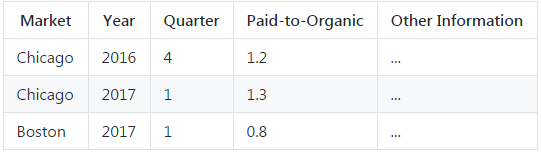

In [8]:
from IPython.display import Image
Image(filename = 'Capture.png', width=450, height=350)

If you've got time, can you find any other interesting insights from this dataset? I'd love you to be creative here. I've got nothing in mind,but there's always something neat you can find, right?

- Please find in section 2 of this notebook visualization of user reponse and cancellation reasons. 

## Read in and prepare data for ratio calculation and visualization

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#enable IPython to display matplotlib graphs
%matplotlib inline
import csv

In [267]:
data=pd.read_csv('spothero_ds_takehome.csv')
data.head(10)

,reservation_id,is_first_purchase,rental_source,rental_source_operating_system,reservation_event_id,discount_promocode_redemption_id,reservation_status,cancellation_reason,discount_promocode_campaign_channel,market,...,user_id,user_email_suffix,user_signup_source,user_signup_timestamp,user_referral_credit_confirmed,survey_id,survey_response,survey_user_text,google_analytics_id,google_analytics_medium
0,61691366ea99ee96e2e1f750b944d157,t,web,Mac OS X,NaN,NaN,valid,NaN,NaN,Chicago,...,073c94b110c3eb3d21da7f4c31684cc2,gmail.com,web,07/15/2015 23:59:16.715,NaN,7a4d7c7e61c53afbbe9ca81085db31cd,"Search Engine (e.g. Google, Yahoo, Bing)",NaN,29732d1b73d1b59e043afc7773810cc7,cpc
1,dd04a6e04de6027cc10f32ae016ebb51,t,web,Windows,NaN,NaN,valid,NaN,NaN,Chicago,...,fe3b73064b27b6b85780be5b89475ec6,yahoo.com,web,04/13/2016 01:14:46.757,NaN,NaN,NaN,NaN,34b8d220e6ada0e25b05640e884f6f47,cpc
2,70564cc67cdcec6402794980f4bc387b,f,web,Windows 7,8cde555185a074974787d524a6ef0c29,NaN,valid,NaN,NaN,Chicago,...,f18c19e43c149a5d47b841cee29acbe2,wickmail.com,web,07/03/2015 03:05:52.88,t,NaN,NaN,NaN,f68e9042cc659ebc3aeee7871a9b9ae6,(none)
3,8b37d36dfe2727e65b80d894eff917ed,t,web,Windows Vista,NaN,NaN,cancelled,Change of Plans,NaN,Chicago,...,236d7255127d4ee8f41039fa4c7298a3,comcast.net,web,11/07/2015 20:50:02.361,NaN,NaN,NaN,NaN,81653796491d8e62a06da7a130a30a72,organic
4,6acdf782d19bb74a6ec5c74966c5efe5,f,web,Windows 7,NaN,NaN,valid,NaN,NaN,Chicago,...,1aec36062da8ce4641520fe79221078d,gmail.com,web,07/15/2014 15:17:18,t,NaN,NaN,NaN,e6e53ce65e96a9ede55b1fc3cb93f55f,organic
5,28399b218b18ff21fcb65436adaded27,t,web,Windows 7,NaN,NaN,valid,NaN,NaN,Chicago,...,e9cd0e4d05f0cd00c80129c8bb72a199,live.com,web,06/17/2015 22:42:53.092,NaN,NaN,NaN,NaN,60acf4751963420390fc8f2cf2f3705f,cpc
6,7824bab3edf6bccab79c959e663fe6ca,t,web,Windows 7,NaN,NaN,valid,NaN,NaN,New York,...,b52100606a7b98864d0da8c0fb962fe8,yahoo.com,web,02/13/2015 15:00:44.128,t,NaN,NaN,NaN,46b8b6e6714658fdd638f023a96b3ed2,cpc
7,dd4422a2c735cd03f02f5ab4825f13aa,f,web,Windows 7,NaN,NaN,valid,NaN,NaN,Chicago,...,044c9621aa73cfb07b7f3f30b9c570a0,sbcglobal.net,web,10/18/2014 11:35:27,t,NaN,NaN,NaN,859672aa0d431de75f734323e5c176b1,(none)
8,8f7a16f1547c0b680caef11157755786,t,web,Windows 7,NaN,NaN,valid,NaN,NaN,Chicago,...,4e717bf9dc086c8b29ed6158b7ce03df,aol.com,web,08/18/2015 20:38:00.062,t,12a84268867e9b12cec05f395cb1742f,Friend or Family,NaN,c90999c746b9da1fed1b84fc73bdcb70,cpc
9,c0e054c65cd8e6abd03f874880dde3c5,t,web,Mac OS X,NaN,NaN,valid,NaN,NaN,Washington,...,daa1a854a39483355b367cf0e0de6e00,gmail.com,web,09/24/2016 17:25:29.942,t,NaN,NaN,NaN,5ff9d0a1cdeffb237d735e10617d7eeb,referral


In [268]:
data.columns

Index(['reservation_id', 'is_first_purchase', 'rental_source',
       'rental_source_operating_system', 'reservation_event_id',
       'discount_promocode_redemption_id', 'reservation_status',
       'cancellation_reason', 'discount_promocode_campaign_channel', 'market',
       'facility_id', 'facility_height_restriction', 'facility_type',
       'user_id', 'user_email_suffix', 'user_signup_source',
       'user_signup_timestamp', 'user_referral_credit_confirmed', 'survey_id',
       'survey_response', 'survey_user_text', 'google_analytics_id',
       'google_analytics_medium'],
      dtype='object')

In [269]:
data['google_analytics_medium'].value_counts()
#numeric variables: none (really? maybe 'facility_height_restriction', consider recode into bins)
#categorical variables with levels > 10: 'rental_source_operating_system', 'facility_height_restriction', 
#'user_email_suffix', 'cancellation_reason','discount_promocode_redemption_id','market', 'survey_response', 'survey_user_text', google_analytics_medium'
#consider recode to reduce dimension for categorical variables with level > 10

organic                    73461
cpc                        62913
(none)                     47524
referral                   21480
email                       3740
desktopweb                  1887
Website                     1319
iosapp                      1137
website                      779
androidapp                   405
partnerships                 274
Partnerships                 123
partner                       72
(not set)                     33
desktop                       33
display                       14
Online                         7
mobile                         7
operator page                  6
social                         5
Email                          3
tablet                         3
Account                        2
Chat                           2
Facebook                       2
soldier-field                  1
partners                       1
Address: 200 W Adams St        1
affiliate                      1
Name: google_analytics_medium, dtype: int64

In [270]:
#rows with missing value check:
data.shape #(215235, 23)
nan_rows = lambda df: df[df.isnull().any(axis=1)]
nan_rows(data).shape #all rows have NaNs

(215235, 23)

In [271]:
#colomns with missing value check:
nan_cols = lambda df: df.columns[df.isnull().any()].tolist()
nan_cols(data)

['reservation_event_id',
 'discount_promocode_redemption_id',
 'cancellation_reason',
 'discount_promocode_campaign_channel',
 'facility_height_restriction',
 'facility_type',
 'user_referral_credit_confirmed',
 'survey_id',
 'survey_response',
 'survey_user_text']

## Label Creation for Classification

In [273]:
data['google_analytics_medium'].value_counts()

organic                    73461
cpc                        62913
(none)                     47524
referral                   21480
email                       3740
desktopweb                  1887
Website                     1319
iosapp                      1137
website                      779
androidapp                   405
partnerships                 274
Partnerships                 123
partner                       72
(not set)                     33
desktop                       33
display                       14
Online                         7
mobile                         7
operator page                  6
social                         5
Email                          3
tablet                         3
Account                        2
Chat                           2
Facebook                       2
soldier-field                  1
partners                       1
Address: 200 W Adams St        1
affiliate                      1
Name: google_analytics_medium, dtype: int64

In [274]:
#create response label: 1 if 'google_analytics_medium' == 'cpc', 0 otherwise
data['label']=np.nan
data.loc[data['google_analytics_medium']=='cpc', 'label']=1
data.loc[data['label'].isnull(),'label']=0
data['label'].value_counts()
#data['label'].isnull().value_counts() #cleared

0.0    152322
1.0     62913
Name: label, dtype: int64

## Feature Engineering

columns = ['reservation_id', 'is_first_purchase', 'rental_source',
       'rental_source_operating_system', 'reservation_event_id',
       'discount_promocode_redemption_id', 'reservation_status',
       'cancellation_reason', 'discount_promocode_campaign_channel', 'market',
       'facility_id', 'facility_height_restriction', 'facility_type',
       'user_id', 'user_email_suffix', 'user_signup_source',
       'user_signup_timestamp', 'user_referral_credit_confirmed', 'survey_id',
       'survey_response', 'survey_user_text', 'google_analytics_id',
       'google_analytics_medium']
       
columns with missing values: ['reservation_event_id',
 'discount_promocode_redemption_id',
 'cancellation_reason',
 'discount_promocode_campaign_channel',
 'facility_height_restriction',
 'facility_type',
 'user_referral_credit_confirmed',
 'survey_id',
 'survey_response',
 'survey_user_text']

## Missin Values Imputation & Reengineering

In [275]:
#1. create new binary variable 'for_event' from 'reservation_event_id' (1 for non empty fields, 0 for NaNs)
#replace 'reservation_event_id' with 'for_event' in the model:
data['for_event']=np.nan
data.loc[~data['reservation_event_id'].isnull(),'for_event']=1
data.loc[data['for_event']!=1,'for_event']=0
data['for_event'].value_counts()
#data['for_event'].isnull().value_counts() #all false, cleared

0.0    199699
1.0     15536
Name: for_event, dtype: int64

In [276]:
##2. create new binary variable 'has_promocode' from 'discount_promocode_redemption_id' indicating whether a promo code was used 
data['has_promocode']=np.nan
data.loc[~data['discount_promocode_redemption_id'].isnull(),'has_promocode']=1
data.loc[data['has_promocode']!=1,'has_promocode']=0
data['has_promocode'].value_counts()
#data['has_promocode'].isnull().value_counts() #all false, cleared

0.0    201295
1.0     13940
Name: has_promocode, dtype: int64

In [277]:
#replacy all missin value in 'cancellation_reason' with 'other'
#need to reduce dimension (extract factors) in the next section
data.loc[data['cancellation_reason'].isnull(),'cancellation_reason']='Other'
#data['cancellation_reason'].value_counts()
#data['cancellation_reason'].isnull().value_counts() #all false, cleared


In [278]:
#missing values in 'discount_promocode_campaign_channel' is highly associated with whether a promocode is used when reserving
data.loc[data[['discount_promocode_redemption_id','discount_promocode_campaign_channel']].isnull().all(axis=1),
         ['discount_promocode_redemption_id','discount_promocode_campaign_channel']].shape #(201295, 2)
#consider recoding all missing values into 'off campaign'
data['discount_promocode_campaign_channel'].value_counts() #201560 missing value
data.loc[data['discount_promocode_campaign_channel'].isnull(),'discount_promocode_campaign_channel']='off campaign'
#data['discount_promocode_campaign_channel'].isnull().value_counts() #all false, cleared

In [279]:
#impute missing values in 'facility_height_restriction' with mode value (80)
data['facility_height_restriction'].isnull().value_counts() #62995 missing values
#df.mode() returns a dataframe
data.loc[data['facility_height_restriction'].isnull(),
         'facility_height_restriction']=data['facility_height_restriction'].mode()[0]
data['facility_height_restriction'].isnull().value_counts() #cleared

False    215235
Name: facility_height_restriction, dtype: int64

In [280]:
#impute missing values in 'facility_type' with mode value 
data['facility_type'].value_counts() 
data['facility_type'].isnull().value_counts() #8570 missing values
data.loc[data['facility_type'].isnull(),'facility_type']=data['facility_type'].mode()[0]
#data['facility_type'].isnull().value_counts() #cleared

In [281]:
#impute missing values in 'user_referral_credit_confirmed' with 'f'
data['user_referral_credit_confirmed'].value_counts() 
data['user_referral_credit_confirmed'].isnull().value_counts() #63503 missing values
data.loc[data[ 'user_referral_credit_confirmed'].isnull(), 'user_referral_credit_confirmed']='f'
#data[ 'user_referral_credit_confirmed'].isnull().value_counts() #cleared

In [282]:
#created new binary variable 'took_survey' from 'survey_id' indicating whether the survey attached with reservation is taken
data['survey_id'].value_counts() 
data['survey_id'].isnull().value_counts() #197206 missing values
data['took_survey']=np.nan
data.loc[data['survey_id'].isnull(),'took_survey']=0
data.loc[~data['survey_id'].isnull(),'took_survey']=1
data['took_survey'].isnull().value_counts() #cleared
data['took_survey'].value_counts()

0.0    197206
1.0     18029
Name: took_survey, dtype: int64

In [284]:
#'survey_response' has missing values suspectively for users who declined survey. Impute with value 'General'.
#also, it seems like the 'survey_user_text' is user's actual typed-in answer to the question "where do you learn about SpotHero?", 
#and 'survey_response' is recoded version of 'survey_user_text' reduced into topics/themes.
#we will use 'survey_reponse' over 'survey_user_text' in the model
data['survey_response'].value_counts()
data['survey_response'].isnull().value_counts() #198543 missing values
data.loc[data['survey_response'].isnull(),'survey_response']='General'
data['survey_response'].isnull().value_counts() #cleared
data['survey_user_text'].isnull().value_counts()

True     213810
False      1425
Name: survey_user_text, dtype: int64

In [285]:
#write 1st version semi-processed dataset to local csv file:
#data.to_csv("data1.csv", sep=',', header=True, index = False)
data.columns

Index(['reservation_id', 'is_first_purchase', 'rental_source',
       'rental_source_operating_system', 'reservation_event_id',
       'discount_promocode_redemption_id', 'reservation_status',
       'cancellation_reason', 'discount_promocode_campaign_channel', 'market',
       'facility_id', 'facility_height_restriction', 'facility_type',
       'user_id', 'user_email_suffix', 'user_signup_source',
       'user_signup_timestamp', 'user_referral_credit_confirmed', 'survey_id',
       'survey_response', 'survey_user_text', 'google_analytics_id',
       'google_analytics_medium', 'label', 'for_event', 'has_promocode',
       'took_survey'],
      dtype='object')

## Feature Recode & Reduction

1.  recode cancellation_reason into reduced number of levels:
    Change of Plans: match 'change of plans', 'change', 'Weather', 'Event Cancellation' 'Event Cancelled' 'cancelled' 'cancellation'
    Book by Mistake: match 'mistake'
    Lost: match 'Lost', 'lost','wrong garage', 'wrong', 'Wrong Garage'
    Reservation Update: match 'Reservation Update', 'Update', 'update'
    Location Closed: match 'Closed' 'Closure' 
    Supply Request: match 'supply request' 'Supply' 'Supply Request'
    Operation Error: 'Lot Full' 'Full' 'lot full' 'full' 'No Attendant Present' 'Vehicle Too Large' 'Attendant' 'Double Charged' 'Scanner' 'Not Accepted','Charged Extra', 'tow', 'towed','Operator'
    Test: 'Test' 'test' 'TEST'
    Fraud: 'fraud' 'Fraud','Fraudulent','fraudulent'

#counts=data['cancellation_reason'].value_counts() #returns a pandas Series
#counts=counts.to_frame().head(100)

In [286]:
#recode new binary variables from cancellatoin reasons indicating different reasons for cancelling reservation:

list_of_cancel_reasons = ['Book_by_Mistake','Lost','Reservation_Update', 'Location_Closed','Supply_Request', 'Operation_Error', 
                          'Testing', 'Fraud']
list_of_list_keywords = [('mistake', 'Mistake'),
                         ('Lost','lost', 'wrong','wrong garage', 'Wrong Garage', 'Wrong garage'),
                         ('Change', 'change','Weather', 'weather', 'Cancelled', 'cancelled','Cancellation', 'cancellation', 
                          'Update', 'update'),
                         ('Closed','closed','Closure','closure'),
                        ('Supply Request','Supply','supply request','supply'),
                        ('Full','full','No Attendant','no attendant','No attendant','Too Large','too large','Double Charged',
                         'double charged','Scanner','scanner','Not Accepted','not accepted','Not accepted',
                         'Charged Extra','charged extra', 'tow', 'Tow','Towed','towed','Operator','operator'),
                        ('Test','test','TEST','Testing','testing','TESTING'),
                        ('Fraud','fraud','Fraudulent','fraudulent')]
#loop to create new variables:
i=0
for reason in list_of_cancel_reasons:
    data[reason]=np.nan
    for keyword in list_of_list_keywords[i]:
        data.loc[data['cancellation_reason'].str.contains(keyword),reason]=1
    i=i+1

#fill in all the NaNs in new binary variables created above with 0
for reason in list_of_cancel_reasons:
    data.loc[data[reason].isnull(),reason]=0

In [287]:
#['Book_by_Mistake','Lost','Reservation_Update', 'Location_Closed','Supply_Request', 'Operation_Error', 'Testing', 'Fraud']
data['Book_by_Mistake'].value_counts()
nan_rows(data[list_of_cancel_reasons]) #zero rows return, cleared

,Book_by_Mistake,Lost,Reservation_Update,Location_Closed,Supply_Request,Operation_Error,Testing,Fraud


2. recode new binary variables from 'rental_source_operating_system' indicating operation systems at rental source:
Windows, iOS, Mac, Chrome, Linux, Ubuntu, Other
#data['rental_source_operating_system'].value_counts()

In [288]:
list_of_operating_systems=['Windows','iOS','Mac','Chrome','Linux','Ubuntu']
list_of_keywords=['Windows','iOS','Mac','Chrome','Linux','Ubuntu']

#enter loop to create new variables
i=0
for system in list_of_operating_systems:
    data[system]=np.nan
    keyword=list_of_keywords[i]
    data.loc[data['rental_source_operating_system'].str.contains(keyword),system]=1
    i=i+1
    
#fill in all NaNs in newly created binary variables with 0:
for system in list_of_operating_systems:
    data.loc[data[system].isnull(),system]=0

In [289]:
#create variable 'Other_system' for rows where rental source system is not any in the list_of_operating_systems:
data['Other_system']=np.nan
sum_systems=data[list_of_operating_systems].sum(axis=1).to_frame()  #pd.sum() here returns a pandas Series
data.loc[sum_systems[0]==0, 'Other_system']=1
data.loc[data['Other_system'].isnull(), 'Other_system']=0

3. for 'discount_promocode_campaign_channel', recode to group all the levels with frequency count <100 into one level together with 'Other'
#data['discount_promocode_campaign_channel'].value_counts()

In [290]:
channel_to_group=['OOH - Billboards','Direct Mail','City Launch','Market Research','ApplePay']
for channel in channel_to_group:
    data.loc[data['discount_promocode_campaign_channel']==channel, 'discount_promocode_campaign_channel']='Other'

data['discount_promocode_campaign_channel'].value_counts()    

off campaign                   201560
Email                            3653
Site                             3052
Radio                            2143
Partnerships                     2106
Paid Search                       861
Other                             833
Social Media                      310
Business Partnerships             239
Deal Sites                        185
Employee Promo Codes              154
Hero Customer Service Codes       139
Name: discount_promocode_campaign_channel, dtype: int64

In [291]:
#4. recode 'market' to group all locations with frequency count <1000 into one level 'Other'
#could also consider recode into regions
freq=data['market'].value_counts().to_frame()
freq.reset_index(level=0, inplace=True)
list_of_markets=freq.loc[freq['market']<1000,'index'].tolist()
list_of_markets

['New Orleans',
 'Oakland',
 'Minneapolis',
 'Seattle',
 'Miami',
 'San Diego',
 'Austin',
 'Houston',
 'San Jose',
 'Indianapolis',
 'St. Louis',
 'Dallas',
 'Atlanta',
 'Orlando',
 'Sacramento',
 'Nashville',
 'Fort Lauderdale',
 'Detroit',
 'Jacksonville',
 'Tampa',
 'Monterey']

In [292]:
data['market2']=np.nan
for market in list_of_markets:
    data.loc[data['market'].str.contains(market),'market2']='Other'
data.loc[data['market2'].isnull(),'market2']=data['market']
data['market2'].value_counts()

Chicago          112654
New York          41632
Washington        20686
Boston            12635
San Francisco     11155
Other              4625
Los Angeles        2649
Philadelphia       2331
Denver             2126
Newark             1640
Baltimore          1561
Milwaukee          1541
Name: market2, dtype: int64

4. recode 'user_email_suffix' to group all levels other than gmail, yahoo, hotmail, aol, comcast into one level 'Other'
#data['user_email_suffix'].value_counts()

In [293]:
data['user_email']=np.nan
list_of_emails=['gmail.com','yahoo.com','hotmail.com','aol.com','comcast.net']
for email in list_of_emails:
    data.loc[data['user_email_suffix'].str.contains(email), 'user_email']=email
data.loc[data['user_email'].isnull(),'user_email']='Other'
data['user_email'].value_counts()

gmail.com      91967
Other          53358
yahoo.com      31886
hotmail.com    14283
aol.com        13910
comcast.net     9831
Name: user_email, dtype: int64

5. recode 'survey_response' to group levels with frequency <e 50 into one level 'General'
Also correct typo, difference in upper/lower case:
    Search engine (e.g. Google, Yahoo, Bing) = Search Engine (e.g. Google, Yahoo, Bing)
    Search Engine = Search Engine (e.g. Google, Yahoo, Bing)
    Friend or family = Friend or Family
    Employer or co-worker = Employer or Co-worker
    Blog or website = Blog or Website
    Ad on a website or mobile app = Ad on a Website or Mobile App
    Website or blog = Blog or Website
    Parking facility (e.g. sign, valet) = Parking Facility (e.g. sign, valet)
    Social Media = Social Media (e.g. Facebook, Twitter)
    Press (newspaper, online, or review site)  = Press (e.g. news story, review site)
    Elevator ad = Elevator Ad
    Received a promo code = Received a Promo Code 
Also, since 'survey_response' and 'survey_user_text' are highly correlated/identical, and 'survey_user_text' has too many missing values, we drop 'survey_user-text' in modeling

#data['survey_response'].value_counts()

In [294]:
words_to_match=['Search','Friend','Blog','Ad on a Website','Website','Parking','Social','Press','Elevator','Received','Event',
               'Ad on a website','Employer']
list_of_responses=['Search Engine','Friend or Family','Blog or Website', 'Ad on a Website or Mobile App', 'Blog or Website',
                   'Parking Facility','Social Media','Press','Elevator Ad','Received a promo code','Event',
                   'Ad on a Website or Mobile App','Employer or Co-worker']
i=0
for word in words_to_match:
    data.loc[data['survey_response'].str.contains(word), 'survey_response']=list_of_responses[i]
    i=i+1
data['survey_response'].value_counts()

General                                    198543
Search Engine                                6537
Friend or Family                             4077
Blog or Website                              2557
Event                                         943
Employer or Co-worker                         818
Radio Ad                                      363
Parking Facility                              328
Received a promo code                         292
Social Media                                  255
Press                                         160
App Store (e.g. iTunes or Google Play)        130
TV                                             65
Outdoor Ad (e.g. billboard, bus, train)        60
Direct Mail Coupon/Flyer                       41
Elevator Ad                                    33
Craigslist                                     22
Ad on a Website or Mobile App                  11
Name: survey_response, dtype: int64

In [295]:
#save for now from cleansing, cause not used in model, but consider do visualization
data['google_analytics_medium'].value_counts()

organic                    73461
cpc                        62913
(none)                     47524
referral                   21480
email                       3740
desktopweb                  1887
Website                     1319
iosapp                      1137
website                      779
androidapp                   405
partnerships                 274
Partnerships                 123
partner                       72
(not set)                     33
desktop                       33
display                       14
Online                         7
mobile                         7
operator page                  6
social                         5
Email                          3
tablet                         3
Account                        2
Chat                           2
Facebook                       2
soldier-field                  1
partners                       1
Address: 200 W Adams St        1
affiliate                      1
Name: google_analytics_medium, dtype: int64

In [358]:
#write processed data to local csv file (pre-onehot-encoded)
#data.to_csv("data2.csv",sep=',',header=True,index=False)
data.columns

Index(['reservation_id', 'is_first_purchase', 'rental_source',
       'rental_source_operating_system', 'reservation_event_id',
       'discount_promocode_redemption_id', 'reservation_status',
       'cancellation_reason', 'discount_promocode_campaign_channel', 'market',
       'facility_id', 'facility_height_restriction', 'facility_type',
       'user_id', 'user_email_suffix', 'user_signup_source',
       'user_signup_timestamp', 'user_referral_credit_confirmed', 'survey_id',
       'survey_response', 'survey_user_text', 'google_analytics_id',
       'google_analytics_medium', 'label', 'for_event', 'has_promocode',
       'took_survey', 'Book_by_Mistake', 'Lost', 'Reservation_Update',
       'Location_Closed', 'Supply_Request', 'Operation_Error', 'Testing',
       'Fraud', 'Windows', 'iOS', 'Mac', 'Chrome', 'Linux', 'Ubuntu',
       'Other_system', 'market2', 'user_email', 'organic_or_cpc', 'year',
       'month', 'day', 'quarter'],
      dtype='object')

## OneHot Encoding & Feature Selection
need to onehot encode all the multi-level categorical variables for models (Logistic Regression, GBM, Decision Tree)
also make sure all the binary variables are encoded in 0 and 1

In [297]:
#drop 'facility_height_restriction' from model:
cols_numeric=[]
#drop cancellation_reason columns from model: 'Book_by_Mistake', 'Lost', 'Reservation_Update','Locatoin_Closed', 'Supply_Request', 
#'Operation_Error', 'Testing','Fraud', 'Location_Closed',
cols_index_binary=[ 'Windows', 'iOS', 'Mac', 'Chrome', 'Linux',
       'Ubuntu', 'Other_system']

cols_to_onehot=['is_first_purchase','rental_source','reservation_status','discount_promocode_campaign_channel', 
                'facility_type','user_signup_source', 'survey_response','market2','user_email']
for col in cols_index_binary:
    data[col]=data[col].astype('category')
for col in cols_to_onehot:
    data[col]=data[col].astype('category')

In [298]:
cols_onehot=pd.get_dummies(data[cols_to_onehot], prefix=cols_to_onehot)
cols_onehot.columns

Index(['is_first_purchase_f', 'is_first_purchase_t',
       'rental_source_mobile-web', 'rental_source_web',
       'rental_source_widget-js', 'reservation_status_cancelled',
       'reservation_status_valid',
       'discount_promocode_campaign_channel_Business Partnerships',
       'discount_promocode_campaign_channel_Deal Sites',
       'discount_promocode_campaign_channel_Email',
       'discount_promocode_campaign_channel_Employee Promo Codes',
       'discount_promocode_campaign_channel_Hero Customer Service Codes',
       'discount_promocode_campaign_channel_Other',
       'discount_promocode_campaign_channel_Paid Search',
       'discount_promocode_campaign_channel_Partnerships',
       'discount_promocode_campaign_channel_Radio ',
       'discount_promocode_campaign_channel_Site ',
       'discount_promocode_campaign_channel_Social Media',
       'discount_promocode_campaign_channel_off campaign',
       'facility_type_garage', 'facility_type_lot',
       'facility_type_person

In [299]:
#3exclude base level column for each categorical variables:
#base categorical variables: 'is_first_purchase_f', 'rental_source_widget-js', 'reservation_status_cancelled', 
#'discount_promocode_campaign_channel_Other','facility_type_personal_spot', 'user_signup_source_manual', 'survey_response_General',
#'market2_Other',     'user_email_Other', 
for col in cols_onehot.columns:
    cols_onehot[col]=cols_onehot[col].astype('category')

#also drop facility_type - 'facility_type_garage', 'facility_type_lot',  
onehot_to_model=['is_first_purchase_t',
       'rental_source_mobile-web', 'rental_source_web',
       'reservation_status_valid',
       'discount_promocode_campaign_channel_Business Partnerships',
       'discount_promocode_campaign_channel_Deal Sites',
       'discount_promocode_campaign_channel_Email',
       'discount_promocode_campaign_channel_Employee Promo Codes',
       'discount_promocode_campaign_channel_Hero Customer Service Codes',
       'discount_promocode_campaign_channel_Paid Search',
       'discount_promocode_campaign_channel_Partnerships',
       'discount_promocode_campaign_channel_Radio ',
       'discount_promocode_campaign_channel_Site ',
       'discount_promocode_campaign_channel_Social Media',
       'discount_promocode_campaign_channel_off campaign',
       'user_signup_source_android',
       'user_signup_source_ios', 
       'user_signup_source_web',
       'survey_response_Ad on a Website or Mobile App',
       'survey_response_App Store (e.g. iTunes or Google Play)',
       'survey_response_Craigslist',
       'survey_response_Direct Mail Coupon/Flyer',
       'survey_response_Employer or Co-worker', 'survey_response_Event',
       'survey_response_Outdoor Ad (e.g. billboard, bus, train)',
       'survey_response_Radio Ad', 'survey_response_Received a promo code',
       'survey_response_Search Engine', 'survey_response_TV',
       'market2_Baltimore', 'market2_Boston', 'market2_Chicago',
       'market2_Denver', 'market2_Los Angeles', 'market2_Milwaukee',
       'market2_New York', 'market2_Newark', 
       'market2_Philadelphia', 'market2_San Francisco', 'market2_Washington',
       'user_email_aol.com', 'user_email_comcast.net',
       'user_email_gmail.com', 'user_email_hotmail.com',
       'user_email_yahoo.com']

In [300]:
cols_to_model=pd.concat([data['label'],data[cols_numeric],data[cols_index_binary], cols_onehot[onehot_to_model]],axis=1)
cols_to_model.head(10)

,label,Windows,iOS,Mac,Chrome,Linux,Ubuntu,Other_system,is_first_purchase_t,rental_source_mobile-web,...,market2_New York,market2_Newark,market2_Philadelphia,market2_San Francisco,market2_Washington,user_email_aol.com,user_email_comcast.net,user_email_gmail.com,user_email_hotmail.com,user_email_yahoo.com
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0





# Paid-to-Organic Ratio

Calculate the paid-to-organic ratio for user acquisitions grouped by market and financial quarter (derived from the user_signup_timestamp field)? Let's assume that a user was organic if google_analytics_medium equals (none), (not set), or organic, and they were paid otherwise. 

In [315]:
#recode 'google_analytics_medium' into new variable 'organic_or_cpc' with three levels - organic, cpc, other
data['google_analytics_medium'].value_counts()
data['organic_or_cpc']=np.nan
data.loc[data['google_analytics_medium']=='cpc', 'organic_or_cpc']='cpc'
to_organic=['organic','(none)','(not set)']
for keyword in to_organic:
    data.loc[data['google_analytics_medium']==keyword, 'organic_or_cpc']='organic'
data.loc[data['organic_or_cpc'].isnull(), 'organic_or_cpc']='other'
data['organic_or_cpc'].value_counts()
#data['google_analytics_medium'].isnull().value_counts() #cleared


organic    121018
cpc         62913
other       31304
Name: organic_or_cpc, dtype: int64

In [328]:
data['user_signup_timestamp'].head(3)

0    07/15/2015 23:59:16.715
1    04/13/2016 01:14:46.757
2     07/03/2015 03:05:52.88
Name: user_signup_timestamp, dtype: object

In [360]:
#parse time variable 'year', 'month', 'quarter' from 'user_signup_timestamp'
from datetime import datetime, date

#create temporal columns
time_cols=['year','month','quarter']
for col in time_cols:
    data[col]=np.nan
    
#loop through 'user_signup_timestamp' and parse into temporal columns: 
#note: nonuniform timestamp format, some end with miliseconds, some don't. Use if statement to filter (too slow)
#data.loc[row_index,'year']=datetime.strptime(data.loc[row_index,'user_signup_timestamp'], '%m/%d/%Y %H:%M:%S.%f').year
#data.loc[row_index,'month']=datetime.strptime(data.loc[row_index,'user_signup_timestamp'], '%m/%d/%Y %H:%M:%S.%f').month
#Or substring the first 19 characters of time string and get rid of miliseconds:

row_index=0
while (row_index < len(data)): 
    data.loc[row_index,'year']=datetime.strptime(data.loc[row_index,'user_signup_timestamp'][:19], '%m/%d/%Y %H:%M:%S').year
    data.loc[row_index,'month']=datetime.strptime(data.loc[row_index,'user_signup_timestamp'][:19], '%m/%d/%Y %H:%M:%S').month
    row_index=row_index+1
    
#fill in 'quarter' column from 'month'
data.loc[data['month']<=3,'quarter']=1
data.loc[(data['month']>3)&(data['month']<=6),'quarter']=2
data.loc[(data['month']>6)&(data['month']<=9),'quarter']=3
data.loc[data['month']>=10,'quarter']=4

In [372]:
#flat out 'organic_or_cpc' variable to binary:
flat_cols=pd.get_dummies(data['organic_or_cpc'], prefix='organic_or_cpc')
flat_cols.columns
data=pd.concat([data,flat_cols],axis=1)
data.columns

Index(['reservation_id', 'is_first_purchase', 'rental_source',
       'rental_source_operating_system', 'reservation_event_id',
       'discount_promocode_redemption_id', 'reservation_status',
       'cancellation_reason', 'discount_promocode_campaign_channel', 'market',
       'facility_id', 'facility_height_restriction', 'facility_type',
       'user_id', 'user_email_suffix', 'user_signup_source',
       'user_signup_timestamp', 'user_referral_credit_confirmed', 'survey_id',
       'survey_response', 'survey_user_text', 'google_analytics_id',
       'google_analytics_medium', 'label', 'for_event', 'has_promocode',
       'took_survey', 'Book_by_Mistake', 'Lost', 'Reservation_Update',
       'Location_Closed', 'Supply_Request', 'Operation_Error', 'Testing',
       'Fraud', 'Windows', 'iOS', 'Mac', 'Chrome', 'Linux', 'Ubuntu',
       'Other_system', 'market2', 'user_email', 'organic_or_cpc', 'year',
       'month', 'quarter', 'organic_or_cpc_cpc', 'organic_or_cpc_organic',
       'orga

In [373]:
#data.to_csv("data3.csv",sep=',',header=True,index=False)
data.columns

Index(['reservation_id', 'is_first_purchase', 'rental_source',
       'rental_source_operating_system', 'reservation_event_id',
       'discount_promocode_redemption_id', 'reservation_status',
       'cancellation_reason', 'discount_promocode_campaign_channel', 'market',
       'facility_id', 'facility_height_restriction', 'facility_type',
       'user_id', 'user_email_suffix', 'user_signup_source',
       'user_signup_timestamp', 'user_referral_credit_confirmed', 'survey_id',
       'survey_response', 'survey_user_text', 'google_analytics_id',
       'google_analytics_medium', 'label', 'for_event', 'has_promocode',
       'took_survey', 'Book_by_Mistake', 'Lost', 'Reservation_Update',
       'Location_Closed', 'Supply_Request', 'Operation_Error', 'Testing',
       'Fraud', 'Windows', 'iOS', 'Mac', 'Chrome', 'Linux', 'Ubuntu',
       'Other_system', 'market2', 'user_email', 'organic_or_cpc', 'year',
       'month', 'quarter', 'organic_or_cpc_cpc', 'organic_or_cpc_organic',
       'orga

In [374]:
pto_counts=data.groupby(['market','year','quarter']).agg({'organic_or_cpc_organic': np.sum, 'organic_or_cpc_cpc': np.sum})
pto_counts.reset_index(inplace=True)
pto_counts

,market,year,quarter,organic_or_cpc_cpc,organic_or_cpc_organic
0,Atlanta,2014.0,2.0,0.0,1.0
1,Atlanta,2015.0,3.0,0.0,0.0
2,Atlanta,2015.0,4.0,0.0,1.0
3,Atlanta,2016.0,1.0,0.0,1.0
4,Atlanta,2016.0,2.0,0.0,2.0
5,Atlanta,2016.0,3.0,1.0,3.0
6,Atlanta,2016.0,4.0,0.0,5.0
7,Atlanta,2017.0,1.0,0.0,11.0
8,Atlanta,2017.0,2.0,26.0,10.0
9,Atlanta,2017.0,3.0,7.0,6.0


In [381]:
#calculate paid to organic ratio:
#take care of corner cases when 'organic_or_cpc_organic' is zero
#when 'organic_or_cpc_organic' = 0, 'paid_to_organic_ratio' = inf
pto_counts['paid_to_organic_ratio']=pto_counts['organic_or_cpc_cpc']/pto_counts['organic_or_cpc_organic']

#filter out cases when 'paid_to_organic_ratio' = inf in table display:
pto_counts[pto_counts['paid_to_organic_ratio']!=np.inf].sort_values(by=['paid_to_organic_ratio'], ascending=0)

,market,year,quarter,organic_or_cpc_cpc,organic_or_cpc_organic,paid_to_organic_ratio
288,Newark,2012.0,4.0,5.0,1.0,5.000000
360,Sacramento,2017.0,2.0,27.0,6.0,4.500000
185,Miami,2016.0,1.0,32.0,8.0,4.000000
418,Seattle,2016.0,1.0,4.0,1.0,4.000000
155,Indianapolis,2017.0,3.0,7.0,2.0,3.500000
133,Houston,2016.0,1.0,13.0,4.0,3.250000
172,Los Angeles,2016.0,1.0,159.0,50.0,3.180000
324,Orlando,2016.0,1.0,6.0,2.0,3.000000
175,Los Angeles,2016.0,4.0,255.0,89.0,2.865169
173,Los Angeles,2016.0,2.0,297.0,107.0,2.775701


# Word Cloud Visualization

In [382]:
from wordcloud import WordCloud

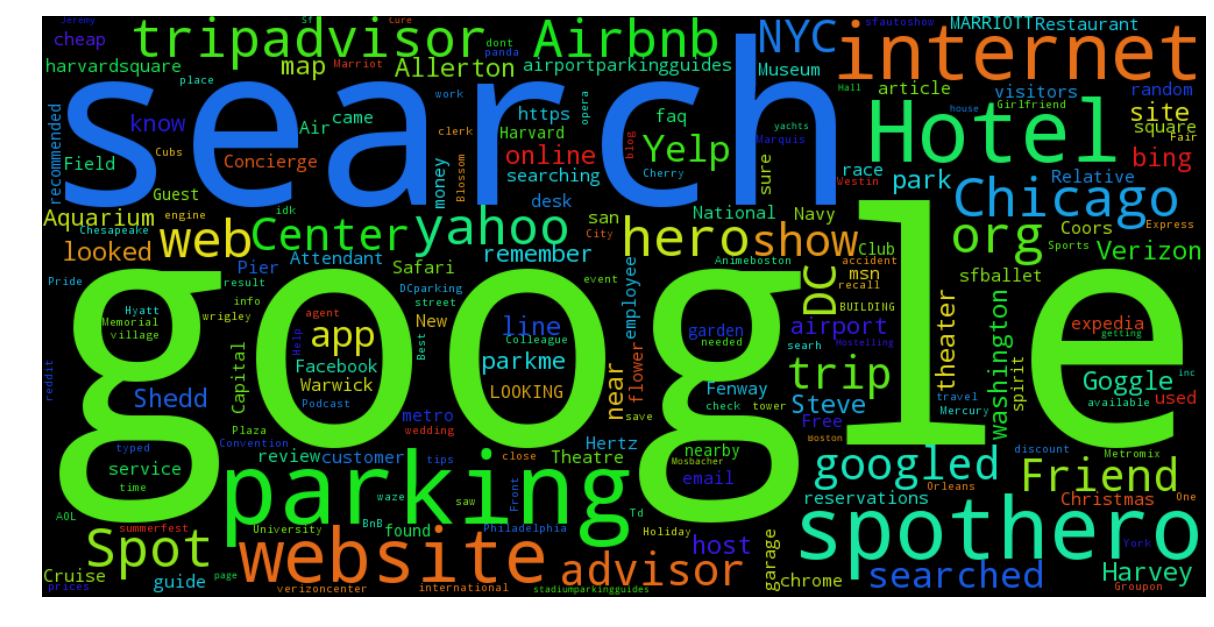

In [391]:
#word cloud visualization of 'survey_user_text'
corpus1=data.loc[~data['survey_user_text'].isnull(),'survey_user_text'].astype(str)
wordcloud1=WordCloud(width=1000, height=500).generate(' '.join(corpus))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

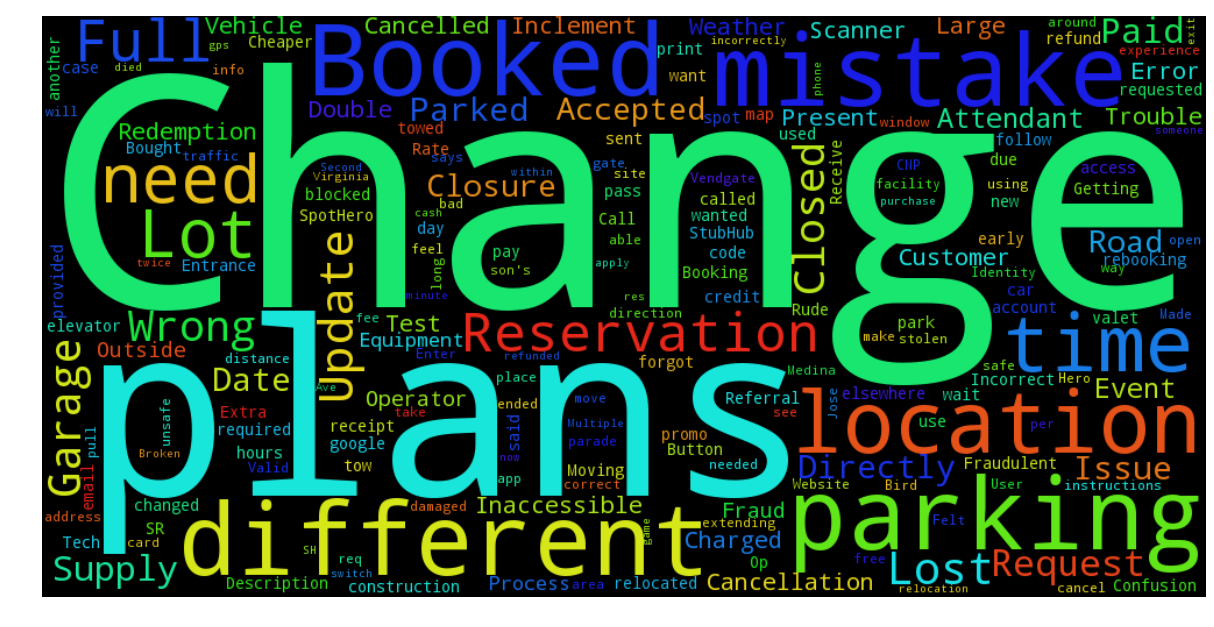

In [394]:
#word cloud visualization of 'survey_user_text'
corpus2=data.loc[~data['cancellation_reason'].isnull(),'cancellation_reason'].astype(str)
wordcloud2=WordCloud(width=1000, height=500).generate(' '.join(corpus2))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()